In [1]:
!pip install -q mediapipe


In [2]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task
!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg



In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

I0000 00:00:1744503798.979228 2600995 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744503799.096506 2601085 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 560.35.03), renderer: Quadro RTX 4000/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1744503799.327694 2601095 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744503799.632362 2601101 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744503799.934282 2601095 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


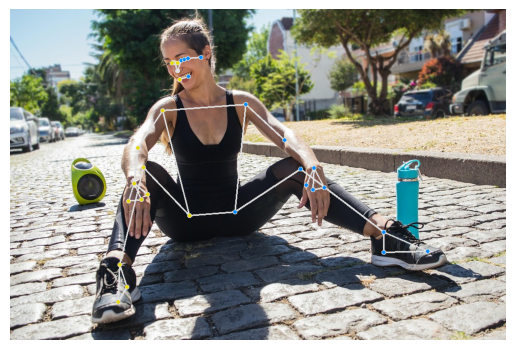

In [2]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
from matplotlib import pyplot as plt

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# Display the image
plt.imshow(annotated_image)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [4]:
import cv2

# Load the video
video_path = 'output.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Get FPS
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(f"FPS: {fps}")

    # Get total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total Frames: {total_frames}")

    # Calculate video duration (in seconds)
    duration_seconds = total_frames / fps
    print(f"Duration: {duration_seconds} seconds")

    # Optionally, you can release the video capture object if needed
    cap.release()

FPS: 30.0
Total Frames: 480
Duration: 16.0 seconds


I0000 00:00:1744503818.214536 2600995 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744503818.296101 2601199 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 560.35.03), renderer: Quadro RTX 4000/PCIe/SSE2
W0000 00:00:1744503818.500266 2601193 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744503818.588444 2601194 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


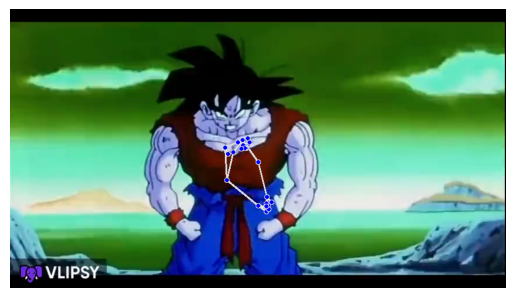

In [5]:
# Initialize MediaPipe Pose Detection
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.3)
mp_drawing = mp.solutions.drawing_utils

def draw_landmarks(image, results):
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS)

video_path = 'output.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    count = 0
    while cap.isOpened() and count < 1:
        ret, frame = cap.read()
        if not ret:
            break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(rgb_frame)
        draw_landmarks(image=frame, results=results)

        plt.imshow(frame)
        plt.axis('off')  
        plt.show()

        count = count + 1

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()